In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
import os 
import joblib 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression


In [2]:
data = pd.read_csv('crop_dataset.csv')
data.head()

,Dist Code,Year,State Code,State Name,Dist Name,Crop,Area_ha,Yield_kg_per_ha,N_req_kg_per_ha,P_req_kg_per_ha,K_req_kg_per_ha,Total_N_kg,Total_P_kg,Total_K_kg,Temperature_C,Humidity_%,pH,Rainfall_mm,Wind_Speed_m_s,Solar_Radiation_MJ_m2_day
0,1,1966,14,Chhattisgarh,Durg,rice,548000.0,337.59,8.43975,4.05108,7.42698,4624983.00,2219991.84,4069985.04,25,80,6.5,1200,2.0,18
1,1,1966,14,Chhattisgarh,Durg,maize,3000.0,666.67,18.00009,8.00004,11.33339,54000.27,24000.12,34000.17,22,70,6.0,800,2.5,20
2,1,1966,14,Chhattisgarh,Durg,chickpea,54000.0,500.00,9.00000,5.00000,9.00000,486000.00,270000.00,486000.00,20,60,6.5,600,1.5,16
3,1,1967,14,Chhattisgarh,Durg,rice,547000.0,747.71,18.69275,8.97252,16.44962,10224934.25,4907968.44,8997942.14,25,80,6.5,1200,2.0,18
4,1,1967,14,Chhattisgarh,Durg,maize,3000.0,1000.00,27.00000,12.00000,17.00000,81000.00,36000.00,51000.00,22,70,6.0,800,2.5,20


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50765 entries, 0 to 50764
Data columns (total 20 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Dist Code                  50765 non-null  int64  
 1   Year                       50765 non-null  int64  
 2   State Code                 50765 non-null  int64  
 3   State Name                 50765 non-null  object 
 4   Dist Name                  50765 non-null  object 
 5   Crop                       50765 non-null  object 
 6   Area_ha                    50765 non-null  float64
 7   Yield_kg_per_ha            50765 non-null  float64
 8   N_req_kg_per_ha            50765 non-null  float64
 9   P_req_kg_per_ha            50765 non-null  float64
 10  K_req_kg_per_ha            50765 non-null  float64
 11  Total_N_kg                 50765 non-null  float64
 12  Total_P_kg                 50765 non-null  float64
 13  Total_K_kg                 50765 non-null  flo

In [4]:
data.dtypes

Dist Code                      int64
Year                           int64
State Code                     int64
State Name                    object
Dist Name                     object
Crop                          object
Area_ha                      float64
Yield_kg_per_ha              float64
N_req_kg_per_ha              float64
P_req_kg_per_ha              float64
K_req_kg_per_ha              float64
Total_N_kg                   float64
Total_P_kg                   float64
Total_K_kg                   float64
Temperature_C                  int64
Humidity_%                     int64
pH                           float64
Rainfall_mm                    int64
Wind_Speed_m_s               float64
Solar_Radiation_MJ_m2_day      int64
dtype: object

In [5]:
data.describe()

,Dist Code,Year,State Code,Area_ha,Yield_kg_per_ha,N_req_kg_per_ha,P_req_kg_per_ha,K_req_kg_per_ha,Total_N_kg,Total_P_kg,Total_K_kg,Temperature_C,Humidity_%,pH,Rainfall_mm,Wind_Speed_m_s,Solar_Radiation_MJ_m2_day
count,50765.000000,50765.000000,50765.000000,5.076500e+04,50765.000000,50765.000000,50765.000000,50765.000000,5.076500e+04,5.076500e+04,5.076500e+04,50765.000000,50765.000000,50765.000000,50765.000000,50765.000000,50765.000000
mean,250.218753,1991.562770,9.169822,6.376523e+04,1159.814711,28.567342,13.517313,22.676814,2.263186e+06,1.080920e+06,1.933931e+06,23.261972,69.454151,6.283906,848.092190,2.156574,18.626298
std,269.062837,14.936844,4.852093,1.127902e+05,1005.066007,26.289891,12.036834,19.432244,5.322257e+06,2.546764e+06,4.640902e+06,2.772772,7.767090,0.247693,239.465123,0.516744,2.066976
min,1.000000,1966.000000,1.000000,1.000000e+01,0.280000,0.007560,0.003360,0.007560,9.180000e+00,4.080000e+00,9.180000e+00,20.000000,60.000000,6.000000,600.000000,1.500000,16.000000
25%,72.000000,1979.000000,6.000000,2.340000e+03,500.000000,10.447020,5.361200,9.720920,3.592870e+04,1.704094e+04,3.023970e+04,20.000000,60.000000,6.000000,600.000000,1.500000,16.000000
50%,144.000000,1992.000000,9.000000,1.690000e+04,922.080000,20.291310,10.030700,17.000000,2.880000e+05,1.400001e+05,2.419987e+05,22.000000,70.000000,6.500000,800.000000,2.000000,18.000000
75%,230.000000,2004.000000,12.000000,6.890000e+04,1533.600000,39.574710,18.188640,29.662820,1.692500e+06,8.081441e+05,1.378628e+06,25.000000,80.000000,6.500000,1200.000000,2.500000,20.000000
max,917.000000,2017.000000,20.000000,1.154230e+06,58363.640000,1050.545520,583.636400,1050.545520,8.037524e+07,3.858011e+07,7.073021e+07,28.000000,80.000000,6.500000,1200.000000,3.000000,22.000000


In [6]:
crop = data['Crop'].value_counts()
print(crop)

Crop
rice        14978
maize       14136
chickpea    13847
cotton       7804
Name: count, dtype: int64


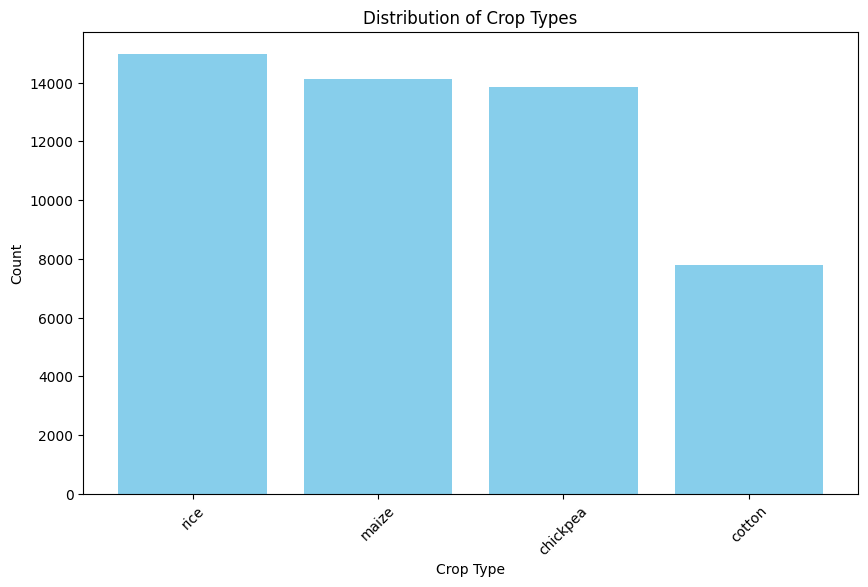

In [7]:
plt.figure(figsize=(10,6))
plt.bar(crop.index, crop.values, color='skyblue')
plt.xticks(rotation=45,
           label=crop.index)
plt.xlabel('Crop Type')
plt.ylabel('Count')
plt.title('Distribution of Crop Types')
plt.show()


In [8]:
data = data.drop(columns = ['Dist Code', 'Year', 'State Code', 'State Name', 'Dist Name'])
data.head()


,Crop,Area_ha,Yield_kg_per_ha,N_req_kg_per_ha,P_req_kg_per_ha,K_req_kg_per_ha,Total_N_kg,Total_P_kg,Total_K_kg,Temperature_C,Humidity_%,pH,Rainfall_mm,Wind_Speed_m_s,Solar_Radiation_MJ_m2_day
0,rice,548000.0,337.59,8.43975,4.05108,7.42698,4624983.00,2219991.84,4069985.04,25,80,6.5,1200,2.0,18
1,maize,3000.0,666.67,18.00009,8.00004,11.33339,54000.27,24000.12,34000.17,22,70,6.0,800,2.5,20
2,chickpea,54000.0,500.00,9.00000,5.00000,9.00000,486000.00,270000.00,486000.00,20,60,6.5,600,1.5,16
3,rice,547000.0,747.71,18.69275,8.97252,16.44962,10224934.25,4907968.44,8997942.14,25,80,6.5,1200,2.0,18
4,maize,3000.0,1000.00,27.00000,12.00000,17.00000,81000.00,36000.00,51000.00,22,70,6.0,800,2.5,20


In [9]:
data = data.drop(columns = ['Wind_Speed_m_s'])
data.head()

,Crop,Area_ha,Yield_kg_per_ha,N_req_kg_per_ha,P_req_kg_per_ha,K_req_kg_per_ha,Total_N_kg,Total_P_kg,Total_K_kg,Temperature_C,Humidity_%,pH,Rainfall_mm,Solar_Radiation_MJ_m2_day
0,rice,548000.0,337.59,8.43975,4.05108,7.42698,4624983.00,2219991.84,4069985.04,25,80,6.5,1200,18
1,maize,3000.0,666.67,18.00009,8.00004,11.33339,54000.27,24000.12,34000.17,22,70,6.0,800,20
2,chickpea,54000.0,500.00,9.00000,5.00000,9.00000,486000.00,270000.00,486000.00,20,60,6.5,600,16
3,rice,547000.0,747.71,18.69275,8.97252,16.44962,10224934.25,4907968.44,8997942.14,25,80,6.5,1200,18
4,maize,3000.0,1000.00,27.00000,12.00000,17.00000,81000.00,36000.00,51000.00,22,70,6.0,800,20


In [10]:
# sns.pairplot(data, hue='Crop')
# plt.show()

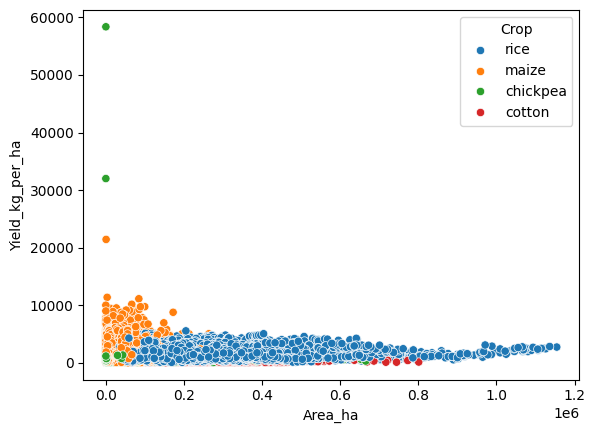

In [11]:
sns.scatterplot(x = data['Area_ha'],y= data['Yield_kg_per_ha'], hue=data['Crop'])
plt.show()

In [12]:
rice_data = data[data['Crop'] == 'rice'].copy()
rice_data.shape

(14978, 14)

In [13]:
rice_data.head()

,Crop,Area_ha,Yield_kg_per_ha,N_req_kg_per_ha,P_req_kg_per_ha,K_req_kg_per_ha,Total_N_kg,Total_P_kg,Total_K_kg,Temperature_C,Humidity_%,pH,Rainfall_mm,Solar_Radiation_MJ_m2_day
0,rice,548000.0,337.59,8.43975,4.05108,7.42698,4.624983e+06,2219991.840,4.069985e+06,25,80,6.5,1200,18
3,rice,547000.0,747.71,18.69275,8.97252,16.44962,1.022493e+07,4907968.440,8.997942e+06,25,80,6.5,1200,18
6,rice,556300.0,841.27,21.03175,10.09524,18.50794,1.169996e+07,5615982.012,1.029597e+07,25,80,6.5,1200,18
9,rice,563400.0,711.40,17.78500,8.53680,15.65080,1.002007e+07,4809633.120,8.817661e+06,25,80,6.5,1200,18
12,rice,571600.0,828.55,20.71375,9.94260,18.22810,1.183998e+07,5683190.160,1.041918e+07,25,80,6.5,1200,18


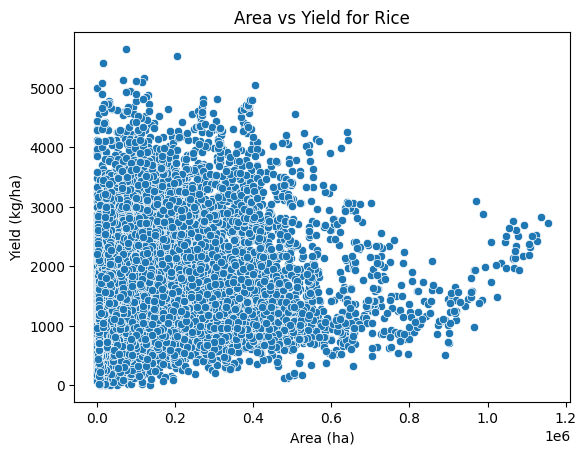

In [13]:
sns.scatterplot(x=rice_data['Area_ha'], y=rice_data['Yield_kg_per_ha'])
plt.title('Area vs Yield for Rice')
plt.xlabel('Area (ha)')
plt.ylabel('Yield (kg/ha)')
plt.show()


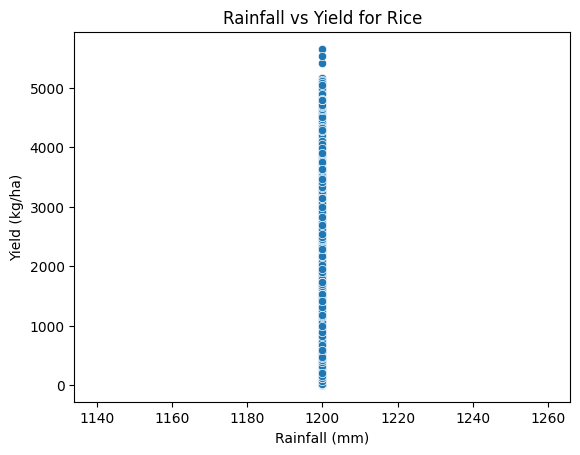

In [14]:
sns.scatterplot(x = rice_data['Rainfall_mm'], y=rice_data['Yield_kg_per_ha'])
plt.title('Rainfall vs Yield for Rice')
plt.xlabel('Rainfall (mm)')
plt.ylabel('Yield (kg/ha)')
plt.show()

In [16]:
# sns.pairplot(rice_data)
# plt.show()

In [15]:
rice_data.dtypes

Crop                          object
Area_ha                      float64
Yield_kg_per_ha              float64
N_req_kg_per_ha              float64
P_req_kg_per_ha              float64
K_req_kg_per_ha              float64
Total_N_kg                   float64
Total_P_kg                   float64
Total_K_kg                   float64
Temperature_C                  int64
Humidity_%                     int64
pH                           float64
Rainfall_mm                    int64
Solar_Radiation_MJ_m2_day      int64
dtype: object

In [16]:
rice_data = rice_data.drop(columns = ['Crop'])
rice_data.head()

,Area_ha,Yield_kg_per_ha,N_req_kg_per_ha,P_req_kg_per_ha,K_req_kg_per_ha,Total_N_kg,Total_P_kg,Total_K_kg,Temperature_C,Humidity_%,pH,Rainfall_mm,Solar_Radiation_MJ_m2_day
0,548000.0,337.59,8.43975,4.05108,7.42698,4.624983e+06,2219991.840,4.069985e+06,25,80,6.5,1200,18
3,547000.0,747.71,18.69275,8.97252,16.44962,1.022493e+07,4907968.440,8.997942e+06,25,80,6.5,1200,18
6,556300.0,841.27,21.03175,10.09524,18.50794,1.169996e+07,5615982.012,1.029597e+07,25,80,6.5,1200,18
9,563400.0,711.40,17.78500,8.53680,15.65080,1.002007e+07,4809633.120,8.817661e+06,25,80,6.5,1200,18
12,571600.0,828.55,20.71375,9.94260,18.22810,1.183998e+07,5683190.160,1.041918e+07,25,80,6.5,1200,18


In [17]:
rice_data = rice_data.drop(columns = [ 'Area_ha', 'Total_N_kg', 'Total_P_kg', 'Total_K_kg', 'Solar_Radiation_MJ_m2_day'])

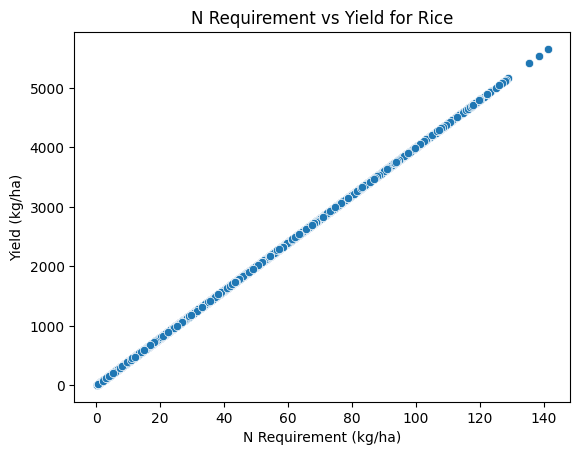

In [18]:
sns.scatterplot(x = rice_data['N_req_kg_per_ha'], y=rice_data['Yield_kg_per_ha'])
plt.title('N Requirement vs Yield for Rice')
plt.xlabel('N Requirement (kg/ha)')
plt.ylabel('Yield (kg/ha)')
plt.show()

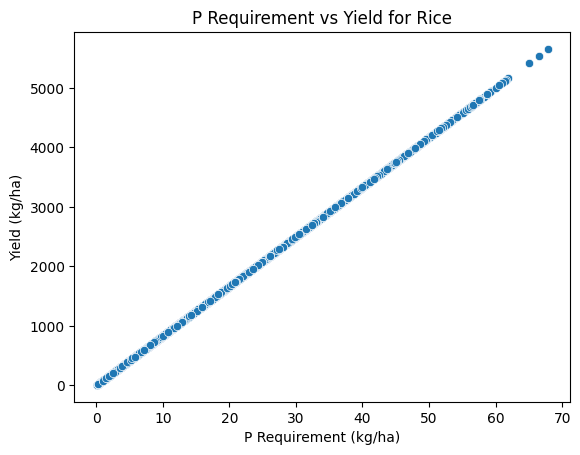

In [19]:
sns.scatterplot(x = rice_data['P_req_kg_per_ha'], y=rice_data['Yield_kg_per_ha'])
plt.title('P Requirement vs Yield for Rice')
plt.xlabel('P Requirement (kg/ha)')
plt.ylabel('Yield (kg/ha)')
plt.show()

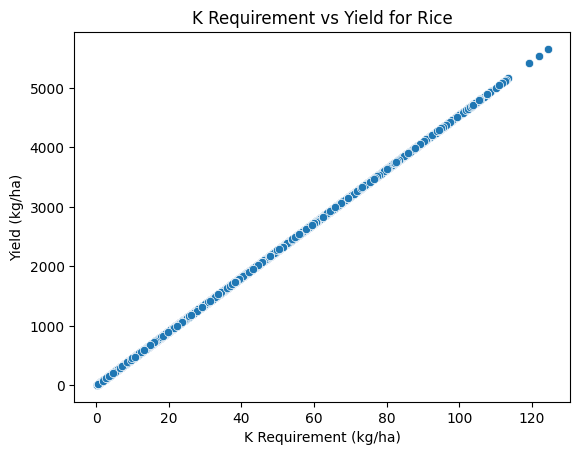

In [20]:
sns.scatterplot(x = rice_data['K_req_kg_per_ha'], y=rice_data['Yield_kg_per_ha'])
plt.title('K Requirement vs Yield for Rice')
plt.xlabel('K Requirement (kg/ha)')
plt.ylabel('Yield (kg/ha)')
plt.show()

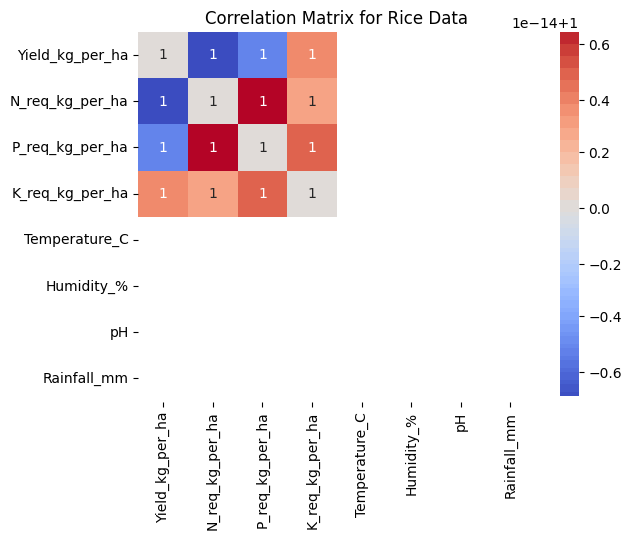

In [21]:
sns.heatmap(rice_data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix for Rice Data')
plt.show()

In [22]:
rice_data = rice_data.drop(columns = ['Temperature_C', 'Humidity_%', 'pH', 'Rainfall_mm'])


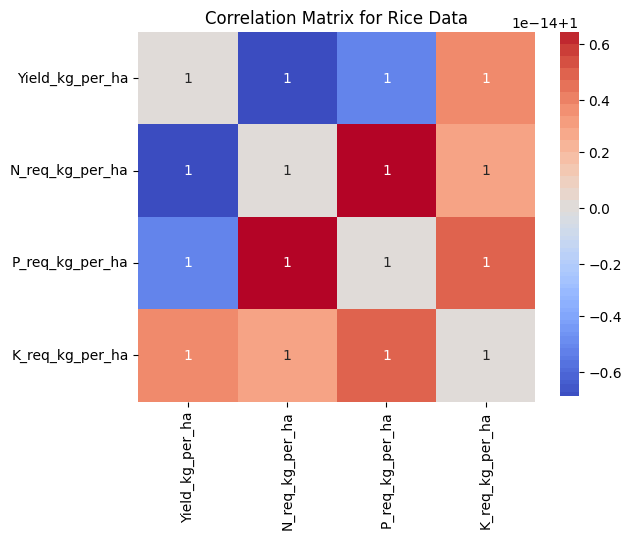

In [23]:
sns.heatmap(rice_data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix for Rice Data')
plt.show()

In [24]:
X= rice_data.drop(columns = ['Yield_kg_per_ha'], axis = 1)
y = rice_data['Yield_kg_per_ha']

In [25]:
x_scale = StandardScaler()
X_scaled = x_scale.fit_transform(X)
X_scaled[:5]

array([[-1.41405828, -1.41405828, -1.41405828],
       [-0.95554782, -0.95554782, -0.95554782],
       [-0.85094859, -0.85094859, -0.85094859],
       [-0.99614208, -0.99614208, -0.99614208],
       [-0.86516943, -0.86516943, -0.86516943]])

In [26]:
x_train, x_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


### Scikit learn 

In [27]:
model = LinearRegression()


In [28]:
model.fit(x_train, y_train)

LinearRegression()

In [29]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
y_pred = model.predict(x_test)

In [30]:
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
print(f'Mean Absolute Error: {mae}')
print(f'R^2 Score: {r2}')

Mean Squared Error: 2.7025988081560496e-26
Mean Absolute Error: 9.962480328902066e-14
R^2 Score: 1.0


In [37]:
# Save the model
filename = 'scikit_learn_yield_linear.joblib'

# 2. Save the model to disk
joblib.dump(model, filename)
print(f"Model successfully saved as {filename}")

Model successfully saved as scikit_learn_yield_linear.joblib


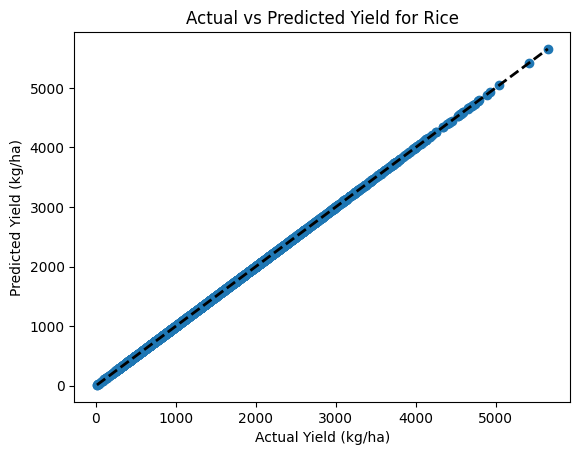

In [31]:
# Prediction graph
plt.scatter(y_test, y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)  # Diagonal line
plt.xlabel('Actual Yield (kg/ha)')
plt.ylabel('Predicted Yield (kg/ha)')
plt.title('Actual vs Predicted Yield for Rice')
plt.show()


In [34]:
# # Save the model
# filename = 'scikit_learn_yield_linear.joblib'

# # 2. Save the model to disk
# joblib.dump(model, filename)
# print(f"Model successfully saved as {filename}")

### From Scratch

In [32]:
rice_data.columns

Index(['Yield_kg_per_ha', 'N_req_kg_per_ha', 'P_req_kg_per_ha',
       'K_req_kg_per_ha'],
      dtype='object')

In [33]:
from sklearn.linear_model import SGDRegressor

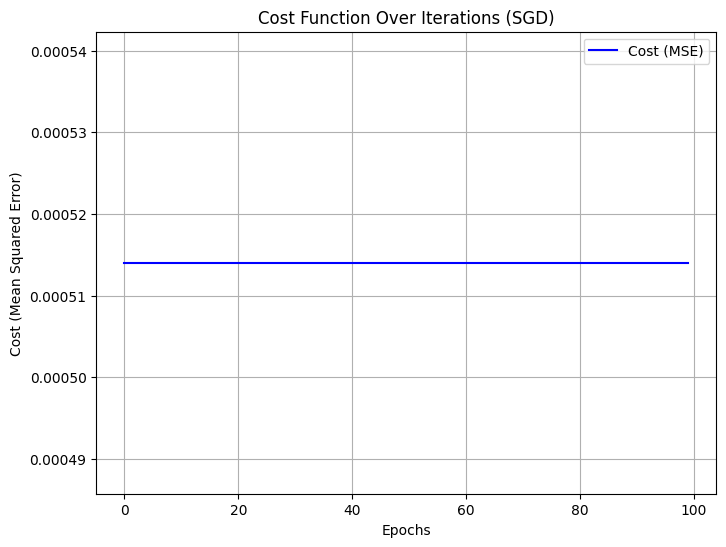

In [34]:
sgd_reg = SGDRegressor(max_iter=1, tol=None, learning_rate='constant', eta0=0.01, random_state=42)

# Step 5: Track the cost (mean squared error) at each iteration
n_epochs = 100
m = len(x_train)
cost_history = []

# Use partial_fit to perform manual iterations
for epoch in range(n_epochs):
    sgd_reg.partial_fit(x_train, y_train)  # partial_fit updates the model incrementally
    y_train_predict = sgd_reg.predict(x_train)
    mse = mean_squared_error(y_train, y_train_predict)
    cost_history.append(mse)

# Step 6: Plot the cost function history
plt.figure(figsize=(8, 6))
plt.plot(range(n_epochs), cost_history, 'b-', label='Cost (MSE)')
plt.title('Cost Function Over Iterations (SGD)')
plt.xlabel('Epochs')
plt.ylabel('Cost (Mean Squared Error)')
plt.grid(True)
plt.legend()
plt.show()


In [35]:
# Step 7: Evaluate the model on the test set
y_pred = sgd_reg.predict(x_test)
mse_test = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2_score = r2_score(y_test, y_pred)
print(f"Final Mean Squared Error on Test Data: {mse_test:.4f}")
print(f"Mean absolute Error: {mae}")
print(f"R^2 score: {r2_score}")
print("Final Coefficients (Weights):", sgd_reg.coef_)
print("Final Intercept (Bias):", sgd_reg.intercept_)

Final Mean Squared Error on Test Data: 0.0005
Mean absolute Error: 0.019114912120487812
R^2 score: 0.9999999993504755
Final Coefficients (Weights): [298.14630907 298.14630907 298.14630907]
Final Intercept (Bias): [1602.4131261]


In [38]:
# save from strach model 
filename = 'from_scratch_yield_model.joblib'

joblib.dump(sgd_reg, filename)

print(f"Trained SGDRegressor model saved successfully as '{filename}'")

Trained SGDRegressor model saved successfully as 'from_scratch_yield_model.joblib'


In [40]:
# # save from strach model 
# filename = 'from_scratch_yield_model.joblib'

# joblib.dump(sgd_reg, filename)

# print(f"Trained SGDRegressor model saved successfully as '{filename}'")

In [36]:
# save standard scaler
scaler_filename = 'standard_scaler.joblib'
joblib.dump(x_scale, scaler_filename)
joblib.dump(x_scale, scaler_filename)
print(f"Standard scaler saved successfully as '{scaler_filename}'")

Standard scaler saved successfully as 'standard_scaler.joblib'
